In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import folium as fo
import plotly as ply
import plotly.graph_objects as go
import matplotlib

from matplotlib.gridspec import GridSpec
from matplotlib.ticker import FuncFormatter
import matplotlib as mpl
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import matplotlib

In [ ]:
colors_pr = [#'#3cb44b',green for land use
    'green',
    'orange',
    '#6a4a3a',
    'grey'
          ]

primary_cm = ListedColormap(colors_pr, name='my_colormap')

In [3]:
p_s = pd.read_excel("refined_liquids_80p.xlsx", sheet_name='stick').iloc[:, :15]
p_2030nl = pd.read_excel("refined_liquids_80p.xlsx", sheet_name='2030nl').iloc[:, :15]
p_2030l = pd.read_excel("refined_liquids_80p.xlsx", sheet_name='2030l').iloc[:, :15]
p_2040nl = pd.read_excel("refined_liquids_80p.xlsx", sheet_name='2040nl').iloc[:, :15]
p_2040l = pd.read_excel("refined_liquids_80p.xlsx", sheet_name='2040l').iloc[:, :15]

In [4]:
all_p=[p_s, p_2030nl, p_2030l, p_2040nl, p_2040l]

In [5]:
# p_s
def cat (df):

    all_p = df['subsector'].unique()
    all_p_coal = df[(df['subsector'].str.contains("coal")) 
                 ]
    all_p_coal['type'] = 'Coal to liquids'

    all_p_gas = df[df['subsector'].str.contains("gas to liquids")
                 ]
    all_p_gas['type'] = 'Gas to liquids'
    all_p_oil = df[df['subsector'].str.contains("oil refining")
                 ]
    all_p_oil['type'] = 'Oil refining'
    
    all_p_bio = df[df['subsector'].str.contains("biomass liquids")
                 ]
    all_p_bio['type'] = 'Biomass liquids'

    
    # 合并数据
    all_df_pp = pd.concat([all_p_coal, all_p_gas,all_p_oil, all_p_bio])

    # 选择特定列
    all_df_pp2 = all_df_pp[['scenario', 'subsector', 'i2015', 'i2020','i2025', 'i2030', 'i2035', 'i2040', 'i2045', 'i2050']]

    # print(all_df_pp2)
    sum_by_type = all_df_pp2.groupby('subsector').sum()
    dfsss=sum_by_type.transpose()
    return(dfsss)

In [6]:
np_s=cat(p_s)
np_2030nl = cat(p_2030nl)
np_2030l = cat(p_2030l)
np_2040nl = cat(p_2040nl)
np_2040l = cat(p_2040l)

C:\Users\Huilin\AppData\Local\Temp\ipykernel_44088\458174411.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_p_coal['type'] = 'Coal to liquids'
C:\Users\Huilin\AppData\Local\Temp\ipykernel_44088\458174411.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_p_gas['type'] = 'Gas to liquids'
C:\Users\Huilin\AppData\Local\Temp\ipykernel_44088\458174411.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

In [7]:
years = ['2015', '2020', '2025', '2030', '2035','2040', '2045', '2050']
np_s.index = years
np_2030nl.index = years
np_2030l.index = years
np_2040nl.index = years
np_2040l.index = years

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


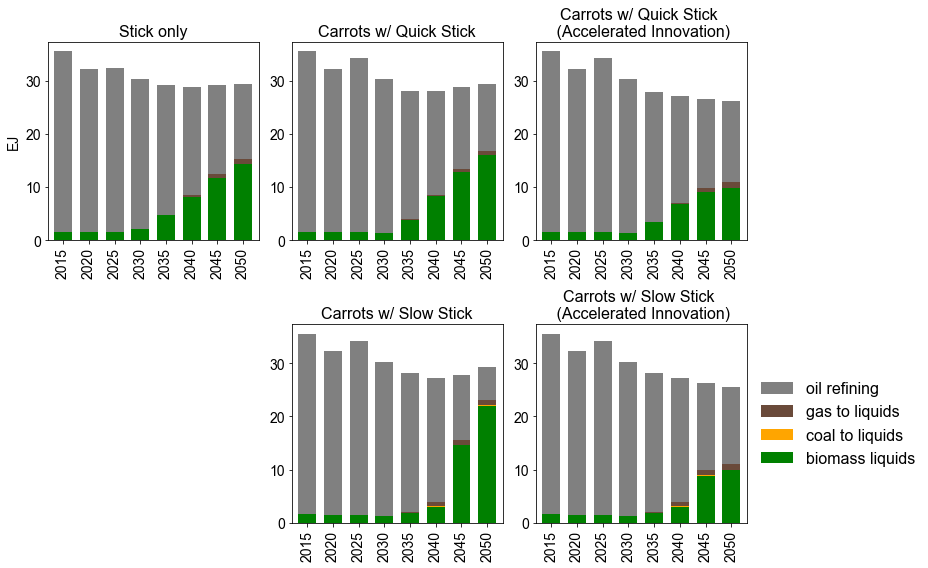

In [ ]:


mpl.rcParams['font.family'] = 'Arial'

fig, axs = plt.subplots(2, 3, figsize=(13, 8), gridspec_kw={'width_ratios': [1, 1, 1], 'height_ratios': [1, 1]})

# plt.suptitle("Refined liquids by technology 2025~2050, 80%", fontsize=18)

axs[1, 0].axis('off')

np_s.plot(kind='bar', stacked=True, ax=axs[0, 0], cmap=primary_cm, width=0.7)
np_2030nl.plot(kind='bar', stacked=True, ax=axs[0, 1], cmap=primary_cm, width=0.7)
np_2030l.plot(kind='bar', stacked=True, ax=axs[0, 2], cmap=primary_cm, width=0.7)
np_2040nl.plot(kind='bar', stacked=True, ax=axs[1, 1], cmap=primary_cm, width=0.7)
np_2040l.plot(kind='bar', stacked=True, ax=axs[1, 2], cmap=primary_cm, width=0.7)

for ax in axs.flat:
    ax.legend().remove()
#     ax.set_ylim(0, 1500)
    ax.tick_params(axis='both', which='major', labelsize=14)

axs[0, 0].set_title('Stick only', fontsize=16)
axs[0, 0].set_ylabel('EJ', fontsize=14)

axs[0, 1].set_title('Carrots w/ Quick Stick', fontsize=16)
axs[0, 2].set_title('Carrots w/ Quick Stick \n (Accelerated Innovation)', fontsize=16)
axs[1, 1].set_title('Carrots w/ Slow Stick', fontsize=16)
axs[1, 2].set_title('Carrots w/ Slow Stick \n (Accelerated Innovation)', fontsize=16)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False, fontsize=16)

# Add a global legend with reversed order
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], loc='center left', bbox_to_anchor=(1, 0.5), frameon=False, fontsize=16)

plt.tight_layout()
plt.show()


subsector,biomass liquids,coal to liquids,gas to liquids,oil refining
2015,1.562441,0.000000,0.000000,33.952754
2020,1.453034,0.000000,0.000000,30.832658
2025,1.457313,0.000000,0.000000,30.841105
2030,2.073092,0.001247,0.017865,28.184726
2035,4.682445,0.009512,0.124090,24.362182
2040,8.086881,0.026806,0.348624,20.329053
2045,11.697761,0.053057,0.698519,16.659120
2050,14.252303,0.073209,0.970411,14.165884
